In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [2]:
# loading the csv data to a Pandas DataFrame
gold_data = pd.read_csv(r"C:\Users\Admin\Downloads\gld_price_data.csv")

In [3]:
# print first 5 rows in the dataframe
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
# print last 5 rows of the dataframe
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [5]:
# number of rows and columns
gold_data.shape

(2290, 6)

In [6]:
# getting some basic informations about the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [7]:
# checking the number of missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [8]:
# getting the statistical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [9]:
#correaltion
#1)positive 
#2)negative

In [10]:
correlation = gold_data.corr()

C:\Users\Admin\AppData\Local\Temp\ipykernel_5712\1828644926.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = gold_data.corr()


<Axes: >

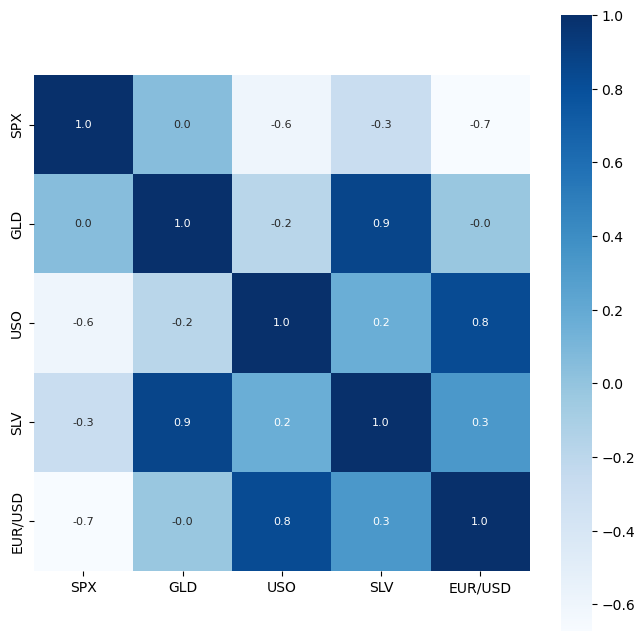

In [11]:
# constructing a heatmap to understand the correlatiom
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')

In [12]:
# correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\Users\Admin\AppData\Local\Temp\ipykernel_5712\563101706.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'],color='green')


<Axes: xlabel='GLD', ylabel='Density'>

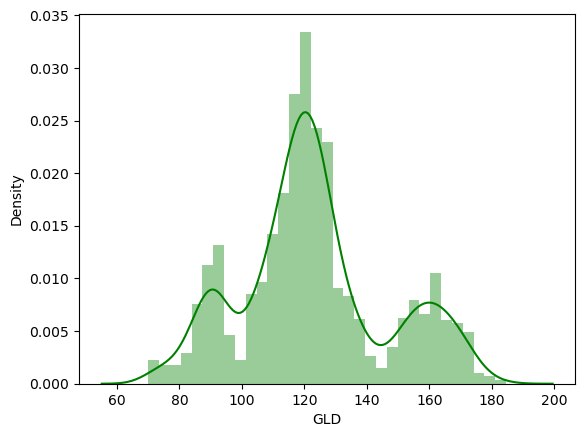

In [13]:
# checking the distribution of the GLD Price
sns.distplot(gold_data['GLD'],color='green')

In [14]:
X = gold_data.drop(['Date','GLD'],axis=1)
Y = gold_data['GLD']

In [15]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [16]:
#splitting into Tranig data and Test data

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

In [18]:
#Model Training: Random Forest Regressor

In [19]:
regressor = RandomForestRegressor(n_estimators=100)

In [20]:
# training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

In [21]:
# prediction on Test Data
test_data_prediction = regressor.predict(X_test)

In [22]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.988523042869139


In [23]:
Y_test = list(Y_test)

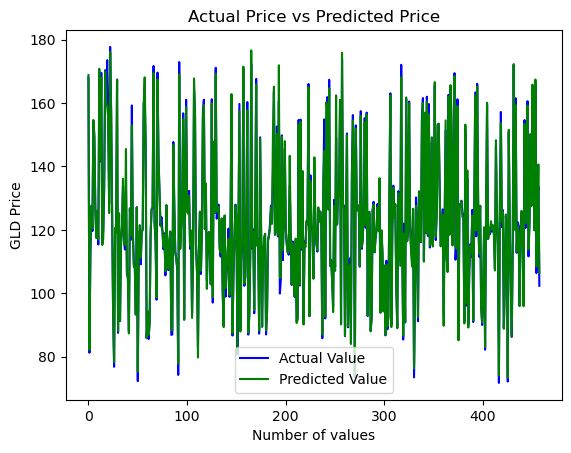

In [24]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


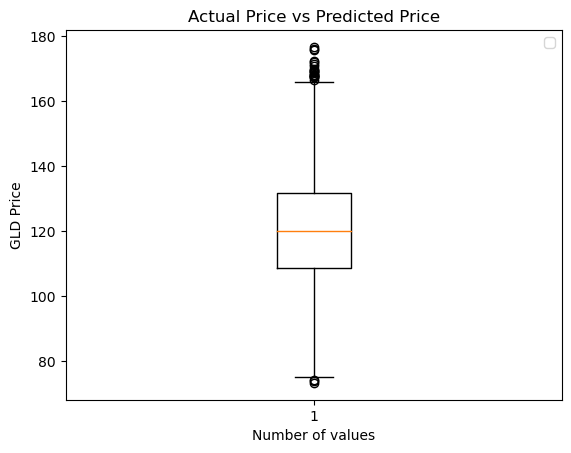

In [28]:
plt.boxplot(test_data_prediction)
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

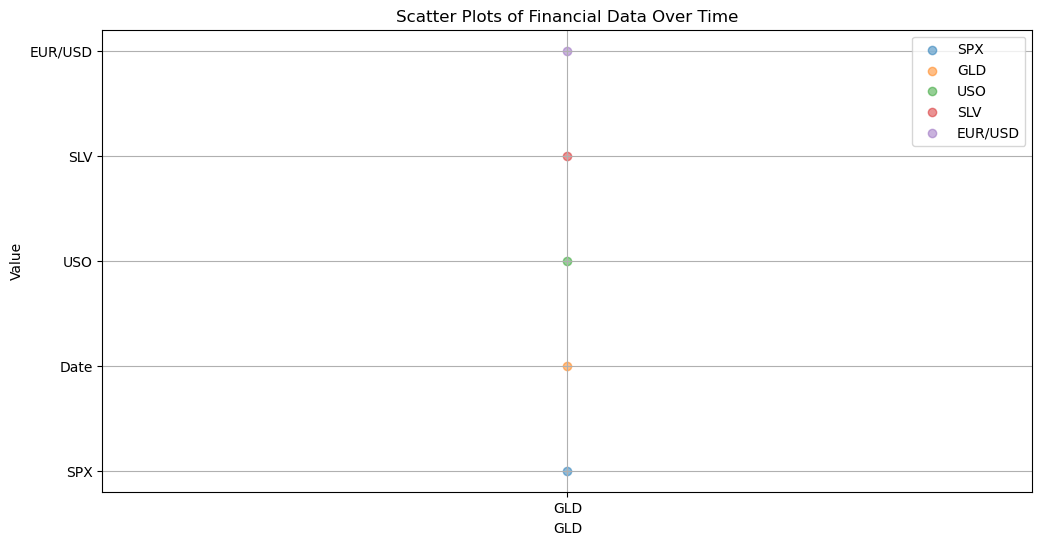

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter Plot
plt.figure(figsize=(12, 6))
plt.scatter(x='GLD', y='SPX', label='SPX', alpha=0.5)
plt.scatter(x='GLD', y='Date', label='GLD', alpha=0.5)
plt.scatter(x='GLD', y='USO', label='USO', alpha=0.5)
plt.scatter(x='GLD', y='SLV', label='SLV', alpha=0.5)
plt.scatter(x='GLD', y='EUR/USD', label='EUR/USD', alpha=0.5)
plt.xlabel('GLD')
plt.ylabel('Value')
plt.title('Scatter Plots of Financial Data Over Time')
plt.legend()
plt.grid(True)
plt.show()

In [15]:
#Importing the Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [16]:
#Reading the dataset
gold_dataset = pd.read_csv(r"C:\Users\Admin\Downloads\gold_rate_history.csv", index_col='Date', header='infer', parse_dates=True, infer_datetime_format=True)

In [17]:
gold_dataset.head()

,Country,State,Location,Pure Gold (24 k),Standard Gold (22 K)
Date,,,,,
2006-01-02,India,Tamilnadu,Chennai,768.0,711.0
2006-01-03,India,Tamilnadu,Chennai,770.5,713.0
2006-01-04,India,Tamilnadu,Chennai,784.5,726.0
2006-01-05,India,Tamilnadu,Chennai,782.5,725.0
2006-01-06,India,Tamilnadu,Chennai,776.0,719.0


In [18]:
#checking missing value
gold_dataset.isna().sum()

Country                 0
State                   0
Location                0
Pure Gold (24 k)        0
Standard Gold (22 K)    0
dtype: int64

In [19]:
# Dropping Unwanted Columns
unwanted_cols = ['Country','State','Location']
gold_dataset.drop(unwanted_cols, axis=1, inplace=True)
gold_dataset.head()

,Pure Gold (24 k),Standard Gold (22 K)
Date,,
2006-01-02,768.0,711.0
2006-01-03,770.5,713.0
2006-01-04,784.5,726.0
2006-01-05,782.5,725.0
2006-01-06,776.0,719.0


In [20]:
# Renaming Columns
gold_dataset.rename(columns={"Pure Gold (24 k)": "Pure_Gold_24k", "Standard Gold (22 K)": "Std_Gold_22k",},inplace=True)
gold_dataset.head()

,Pure_Gold_24k,Std_Gold_22k
Date,,
2006-01-02,768.0,711.0
2006-01-03,770.5,713.0
2006-01-04,784.5,726.0
2006-01-05,782.5,725.0
2006-01-06,776.0,719.0


In [21]:
#For Nnormalizing real-valued input and output variables
from sklearn.preprocessing import MinMaxScaler
cols = gold_dataset.columns
idx = gold_dataset.index
scaler = MinMaxScaler(feature_range=(0,1))

df_scaled = pd.DataFrame(scaler.fit_transform(gold_dataset), columns=cols, index=idx)

In [22]:
gold_dataset.shape

(4971, 2)

In [23]:
gold_dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4971 entries, 2006-01-02 to 2020-10-10
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pure_Gold_24k  4971 non-null   float64
 1   Std_Gold_22k   4971 non-null   float64
dtypes: float64(2)
memory usage: 116.5 KB


In [24]:
#Gold price in chennai from 2006 to 2020
fig = px.line(gold_dataset, x=gold_dataset.index, y=gold_dataset.columns, title='Gold Prices in Chennai (2006-2020)')
fig.update_xaxes(tickangle=45)
fig.show()

In [25]:
df_svr = df_scaled.copy()

# Converting Date Index to Column for Feature Extraction
df_svr.reset_index(level=0, inplace=True)

# Time Feature Extraction
df_svr['year']=df_svr['Date'].dt.year 
df_svr['month']=df_svr['Date'].dt.month 
df_svr['day']=df_svr['Date'].dt.day
df_svr['quarter']=df_svr['Date'].dt.quarter
df_svr['weekofyear']=df_svr['Date'].dt.weekofyear
df_svr['weekday']=df_svr['Date'].dt.weekday

# Dropping Date Column
df_svr.drop('Date',axis=1,inplace=True)

df_svr

C:\Users\Admin\AppData\Local\Temp\ipykernel_9172\986788838.py:11: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.



,Pure_Gold_24k,Std_Gold_22k,year,month,day,quarter,weekofyear,weekday
0,0.000000,0.000000,2006,1,2,1,1,0
1,0.000508,0.000425,2006,1,3,1,1,1
2,0.003354,0.003188,2006,1,4,1,1,2
3,0.002948,0.002976,2006,1,5,1,1,3
4,0.001626,0.001700,2006,1,6,1,1,4
...,...,...,...,...,...,...,...,...
4966,0.881277,0.881828,2020,10,6,4,41,1
4967,0.869689,0.870351,2020,10,7,4,41,2
4968,0.870705,0.871201,2020,10,8,4,41,3
4969,0.879244,0.879702,2020,10,9,4,41,4


In [26]:
# Feature Engineering
features = ['year','month','day','quarter','weekofyear','weekday']

target_24k = ['Pure_Gold_24k']
target_22k = ['Std_Gold_22k']

X = df_svr[features]
y_24k = df_svr[target_24k]
y_22k = df_svr[target_22k]

#validation size
size = 0.1

#Splitting the dataset
from sklearn.model_selection import train_test_split
X_train_24k, X_val_24k, y_train_24k, y_val_24k = train_test_split(X, y_24k, test_size=size, random_state=42)
X_train_22k, X_val_22k, y_train_22k, y_val_22k = train_test_split(X, y_22k, test_size=size, random_state=42)

In [27]:
#mode building using SVR
from sklearn.svm import SVR
regressor = SVR(kernel = 'linear')

#For 24k gold
regressor.fit(X_train_24k, np.ravel(y_train_24k))
y_pred_24k = regressor.predict(X_val_24k)

#For 22k gold
regressor.fit(X_train_22k, np.ravel(y_train_22k))
y_pred_22k = regressor.predict(X_val_22k)

In [28]:
from sklearn import metrics as mt

#For 24k gold
rmse = mt.mean_squared_error(y_val_24k,y_pred_24k)
r2_score = mt.r2_score(y_val_24k,y_pred_24k)

print(" Model evaluation for 24k gold")
print("Root Mean Square Error: ", rmse)
print("R Squared value: ", r2_score)


#For 22k gold
rmse = mt.mean_squared_error(y_val_22k,y_pred_22k)
r2_score = mt.r2_score(y_val_22k,y_pred_22k)

print("\n")
print("Model evaluation for 22k gold")
print("Root Mean Square Error: ", rmse)
print("R Squared value: ", r2_score)

 Model evaluation for 24k gold
Root Mean Square Error:  0.0069129179790862255
R Squared value:  0.8203559306350131


Model evaluation for 22k gold
Root Mean Square Error:  0.0066595747378093454
R Squared value:  0.8275928201607174


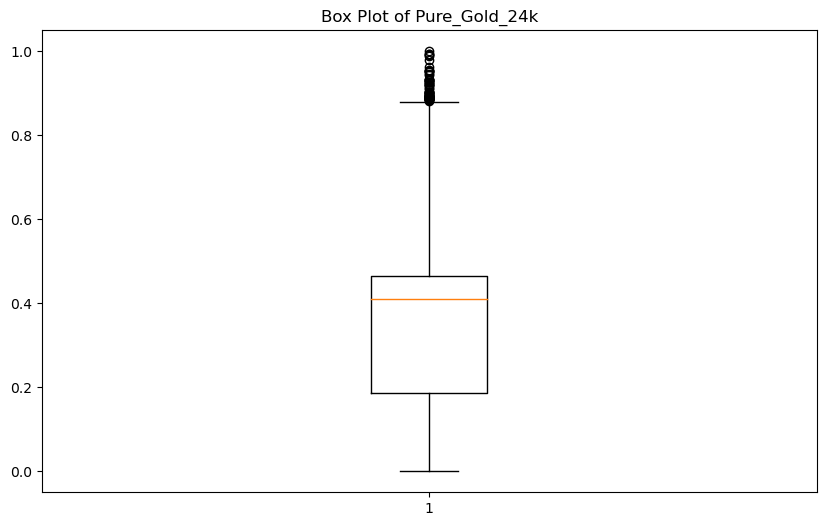

In [29]:
# Box Plot
plt.figure(figsize=(10, 6))
plt.boxplot(x='Pure_Gold_24k', data=df_svr)
plt.title('Box Plot of Pure_Gold_24k')
plt.show()

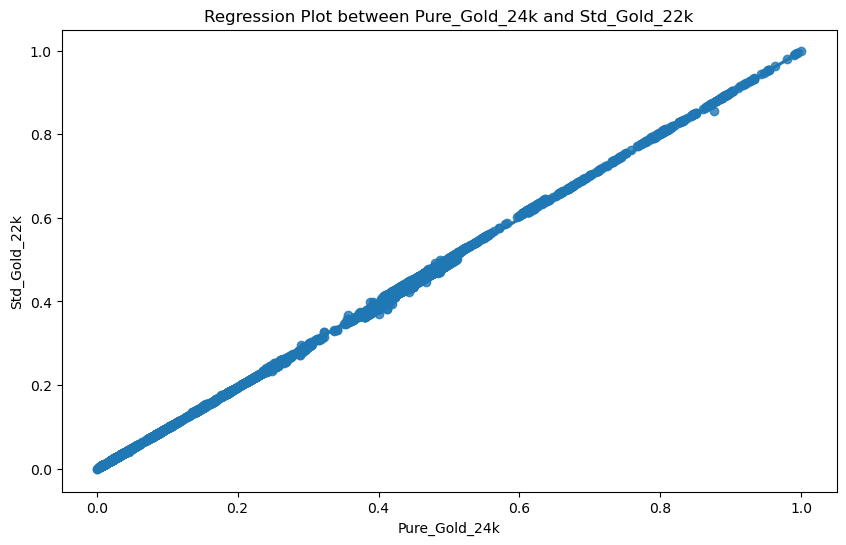

In [55]:
plt.figure(figsize=(10, 6))
sns.regplot(x='Pure_Gold_24k', y='Std_Gold_22k', data=df_svr)
plt.title('Regression Plot between Pure_Gold_24k and Std_Gold_22k')
plt.show()

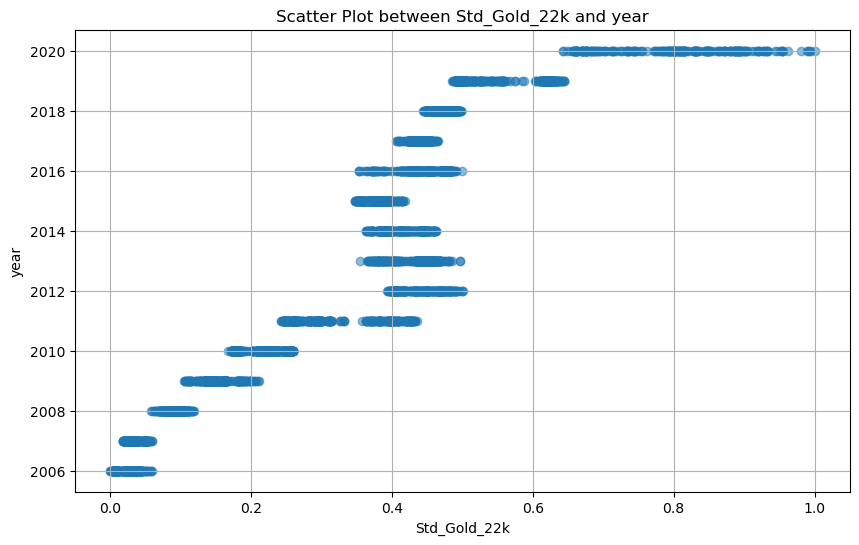

In [72]:
plt.figure(figsize=(10, 6))
plt.scatter(df_svr['Std_Gold_22k'], df_svr['year'], alpha=0.5)
plt.xlabel('Std_Gold_22k')
plt.ylabel('year')
plt.title('Scatter Plot between Std_Gold_22k and year')
plt.grid(True)
plt.show()